In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris, load_wine
import pandas as pd
from sklearn.decomposition import NMF, non_negative_factorization
from scipy.io import loadmat

In [2]:
from ukmeans import UKMeans

# Simple example

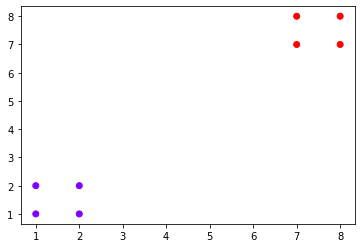

In [3]:
X = np.array(
    [
        [1, 1],
        [1, 2],
        [2, 1],
        [2, 2],

        [7, 7],
        [7, 8],
        [8, 7],
        [8, 8],
    ]
)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')

In [4]:
y[np.argmin(np.linalg.norm(X-np.array([[1.5,1.5]]), axis=1))]

0

In [5]:
clf = UKMeans(epsilon=1e-8)
clf.fit(X)

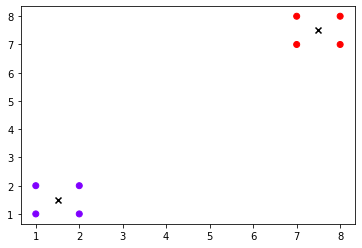

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')
plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1], c='black', marker='x')

In [7]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 1, number of clusters: 2, AR: 1.0


# Example 1

In [19]:
rng = np.random.default_rng(seed=1)

mu = {
    1: np.array([5, 2]),
    2: np.array([3, 4]),
    3: np.array([8, 4]),
    4: np.array([6, 6]),
    5: np.array([10, 8]),
    6: np.array([7, 10]),
}

sigma = np.array([
    [0.4, 0],
    [0, 0.4],
])

X = np.zeros((400, 2))
y = np.zeros(400)
for i in range(400):
    c = rng.integers(1, 7)
    X[i] = rng.multivariate_normal(mu[c], sigma)
    y[i] = c-1


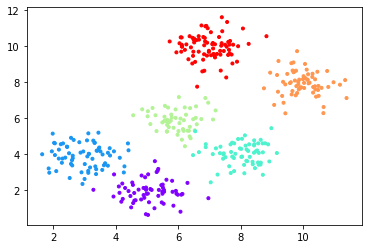

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, marker='.', cmap='rainbow')


In [10]:
clf = UKMeans(epsilon=1e-5)
clf.fit(X)

In [11]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 13, number of clusters: 6, AR: 0.99


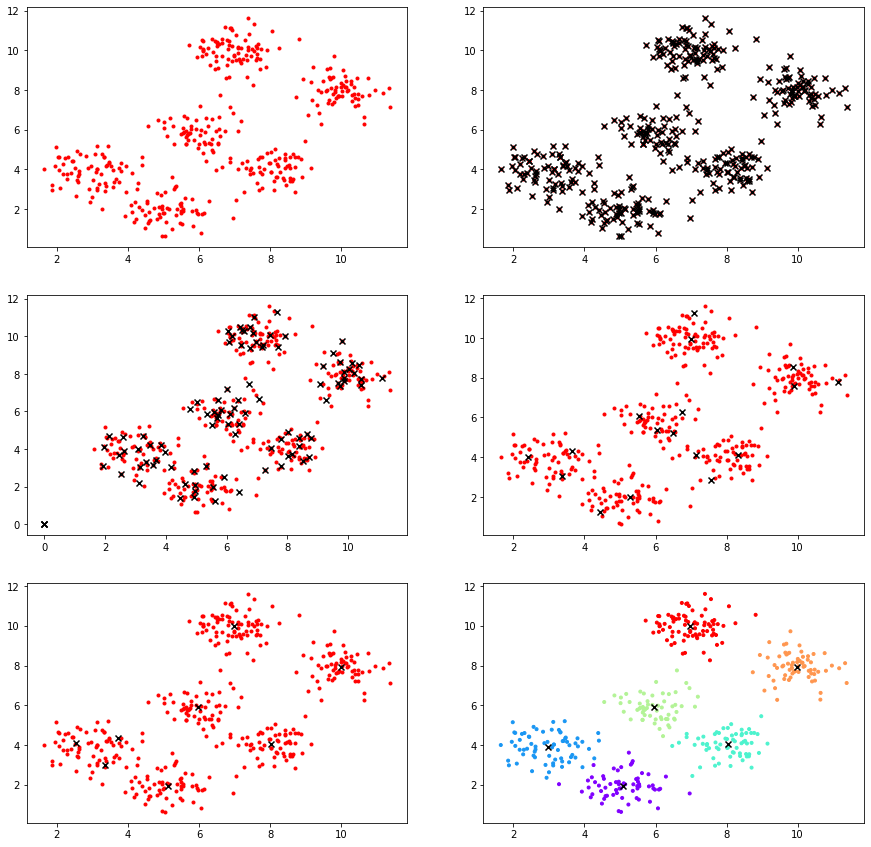

In [12]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(3, 2, 1)
ax.scatter(X[:, 0], X[:, 1], c='red', marker='.')

ax = fig.add_subplot(3, 2, 2)
ax.scatter(X[:, 0], X[:, 1], c='red', marker='.')
ax.scatter(clf.record[0]['centroids'][:,0], clf.record[0]['centroids'][:,1], c='black', marker='x')

ax = fig.add_subplot(3, 2, 3)
ax.scatter(X[:, 0], X[:, 1], c='red', marker='.')
ax.scatter(clf.record[1]['centroids'][:,0], clf.record[1]['centroids'][:,1], c='black', marker='x')

ax = fig.add_subplot(3, 2, 4)
ax.scatter(X[:, 0], X[:, 1], c='red', marker='.')
ax.scatter(clf.record[3]['centroids'][:,0], clf.record[3]['centroids'][:,1], c='black', marker='x')

ax = fig.add_subplot(3, 2, 5)
ax.scatter(X[:, 0], X[:, 1], c='red', marker='.')
ax.scatter(clf.record[8]['centroids'][:,0], clf.record[8]['centroids'][:,1], c='black', marker='x')

ax = fig.add_subplot(3, 2, 6)
ax.scatter(X[:, 0], X[:, 1], c=clf.predict(X), marker='.', cmap='rainbow')
ax.scatter(clf.centroids[:, 0], clf.centroids[:, 1], c='black', marker='x')

## With noisy dataset

In [21]:
rng = np.random.default_rng(seed=1)
for i in range(50):
    noise = rng.uniform(-2,2,(1,2))
    c = rng.integers(1, 7)

    X = np.concatenate((X, noise+mu[c]))
    y = np.concatenate((y, [c-1]))


In [22]:
clf = UKMeans(epsilon=1e-5)
clf.fit(X)

In [23]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 20, number of clusters: 6, AR: 0.9688888888888889


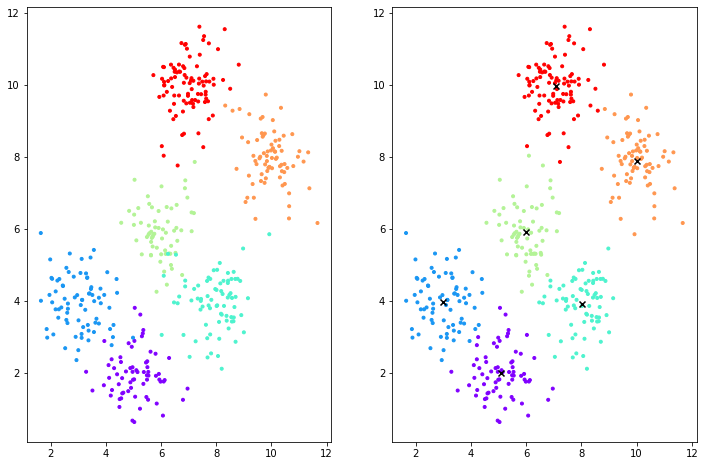

In [24]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:, 0], X[:, 1], c=y, marker='.', cmap='rainbow')

ax = fig.add_subplot(1, 2, 2)
ax.scatter(X[:, 0], X[:, 1], c=clf.predict(X), marker='.', cmap='rainbow')
ax.scatter(clf.centroids[:, 0], clf.centroids[:, 1], c='black', marker='x')

# Example 2

In [32]:
# rng = np.random.default_rng(seed=1)

# mu = {
#     1: np.array([16, 15, 13]),
#     2: np.array([16, 10, 13]),
    
#     3: np.array([10, 20, 10]),
#     4: np.array([10, 15, 9]),
#     5: np.array([10, 10, 9]),

#     6: np.array([6, 20, 6]),
#     7: np.array([6, 15, 5]),
#     8: np.array([6, 10, 5]),
#     9: np.array([8, 5, 5]),
#     10: np.array([8, 0, 5]),

#     11: np.array([3, 20, 2]),
#     12: np.array([3, 15, 2]),
#     13: np.array([0, 15, 4]),
#     14: np.array([0, 10, 4]),
# }

# sigma = np.eye(3)

# X = np.zeros((800, 3))
# y = np.zeros(800)
# for i in range(800):
#     c = rng.integers(1, 15)
#     X[i] = rng.multivariate_normal(mu[c], sigma)
#     y[i] = c

X, y = make_blobs(n_samples=800, center_box=(-2,20), centers=14, cluster_std=0.70, n_features=3, random_state=0)


In [33]:
clf = UKMeans(epsilon=1e-9)
clf.fit(X)


In [34]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 20, number of clusters: 14, AR: 0.99625


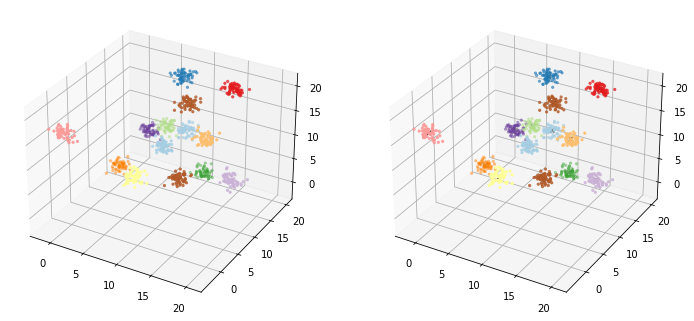

In [35]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, marker='.', cmap='Paired')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clf.predict(X), marker='.', cmap='Paired')
ax.scatter(clf.centroids[:, 0], clf.centroids[:, 1], clf.centroids[:, 2], c='black', marker='x')


# Example 3

## paper

In [53]:
rng = np.random.default_rng(seed=1)

alpha = [0.2, 0.3, 0.1, 0.1, 0.2, 0.1]

mu = {
    1: np.array([2, 4, 6, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 3, 5, 0, 0, 1]),
    2: np.array([0, 1, 3, 5, 0.1, 0.1, 0.5, 0.5, 0, 0, 2, 4, 3, 1, 1, 1, 0.25, 0.5, 0.7, 2.5]),
    3: np.array([5, 5, 5, 5, 4, 4, 4, 4, 6, 6, 6, 6, 8, 8, 8, 8, 1, 1, 1, 1]),
    4: np.array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7]),
    5: np.array([1.25, 1.3, 1.45, 1.5, 2.25, 2.3, 2.45, 2.5, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2]),
    6: np.array([0, 0, 1, 1, 0.5, 0.5, 2.5, 2.5, 5, 5, 1, 1, 5, 5, 0, 0, 0.75, 1.5, 3.5, 5.5]),
}

cov = np.eye(20)

centers = list(mu.values())
X, y = make_blobs(n_samples=900, centers=centers, cluster_std=0.8, n_features=20, random_state=0)

In [54]:
clf = UKMeans(epsilon=1e-4)
clf.fit(X)

In [55]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 11, number of clusters: 6, AR: 1.0


# Example 4

In [56]:
def is_inside_square(p, cneter, side):
    return np.all(p >= cneter-side/2) and np.all(p <= cneter+side/2)


def generate_square(samples, centers, sides, angle):
    r = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)],
    ])
    X = np.zeros((samples, centers.shape[1]))
    y = np.zeros(samples)
    for i in range(samples):
        c = rng.integers(9)
        cov = np.eye(2)*sides[c]
        p = rng.multivariate_normal(np.array([0,0]), cov)
        while not is_inside_square(p, np.array([0,0]), sides[c]):
            p = rng.multivariate_normal(np.array([0,0]), cov)
        X[i] = r@p
        X[i] += centers[c]
        y[i] = c
    return X, y


In [57]:
centers = np.array([
    [-1, 0],
    [1, 0],
    [3, 0],

    [-1, 2],
    [1, 2],
    [3, 2],

    [-1, 4],
    [1, 4],
    [3, 4],
])
X, y = generate_square(3000, centers=centers, sides=[1.5]*9, angle=np.pi/4)


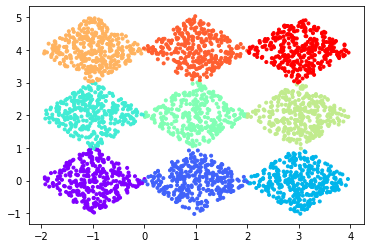

In [58]:
plt.scatter(X[:, 0], X[:, 1], c=y, marker='.', cmap='rainbow')

In [59]:
clf = UKMeans(epsilon=1e-4)
clf.fit(X)

In [60]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 11, number of clusters: 9, AR: 0.996


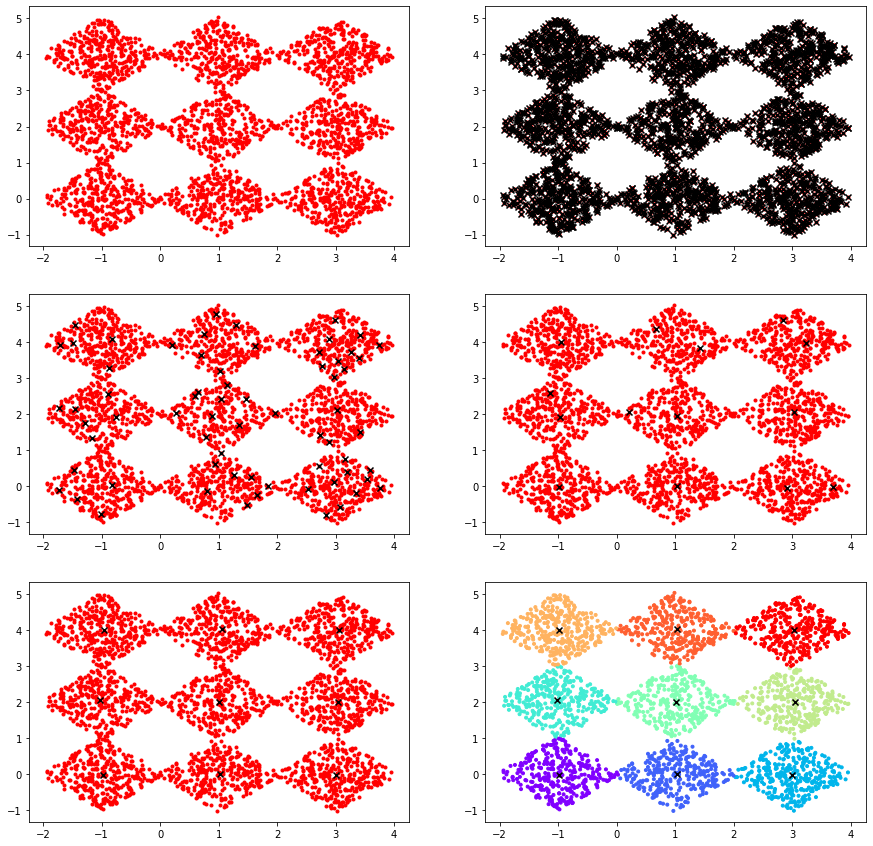

In [61]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(3, 2, 1)
ax.scatter(X[:, 0], X[:, 1], c='red', marker='.')

ax = fig.add_subplot(3, 2, 2)
ax.scatter(X[:, 0], X[:, 1], c='red', marker='.')
ax.scatter(clf.record[0]['centroids'][:,0], clf.record[0]['centroids'][:,1], c='black', marker='x')

ax = fig.add_subplot(3, 2, 3)
ax.scatter(X[:, 0], X[:, 1], c='red', marker='.')
ax.scatter(clf.record[2]['centroids'][:,0], clf.record[2]['centroids'][:,1], c='black', marker='x')

ax = fig.add_subplot(3, 2, 4)
ax.scatter(X[:, 0], X[:, 1], c='red', marker='.')
ax.scatter(clf.record[4]['centroids'][:,0], clf.record[4]['centroids'][:,1], c='black', marker='x')

ax = fig.add_subplot(3, 2, 5)
ax.scatter(X[:, 0], X[:, 1], c='red', marker='.')
ax.scatter(clf.record[6]['centroids'][:,0], clf.record[6]['centroids'][:,1], c='black', marker='x')

ax = fig.add_subplot(3, 2, 6)
ax.scatter(X[:, 0], X[:, 1], c=clf.predict(X), marker='.', cmap='rainbow')
ax.scatter(clf.centroids[:, 0], clf.centroids[:, 1], c='black', marker='x')

# Example 5
## IRIS

In [62]:
X, y = load_iris(return_X_y=True)
# X = NMF(init='', max_iter=10000, shuffle=False).fit_transform(X)
clf = UKMeans(epsilon=1e-1)
clf.fit(X)

In [64]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 8, number of clusters: 3, AR: 0.8733333333333333


## seeds

In [68]:
seeds_df = pd.read_csv("datasets/seeds_dataset.txt", header=None, delimiter="\t")
X,y = seeds_df.iloc[:,:-1].to_numpy(), seeds_df.iloc[:,-1].to_numpy()
y = y-1
# X = NMF(init=None, max_iter=10000, shuffle=False).fit_transform(X)
clf = UKMeans(epsilon=1e-5)
clf.fit(X)

In [69]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 16, number of clusters: 3, AR: 0.8857142857142857


## austrailian

*Failed*

In [121]:
aus_df = pd.read_csv('datasets/australian.dat', header=None, delimiter=" ")
X, y = aus_df.iloc[:,:-1].to_numpy(), aus_df.iloc[:,-1].to_numpy()
X = NMF(init=None, max_iter=100000, shuffle=True, random_state=None).fit_transform(X)
clf = UKMeans(epsilon=1e-1)
clf.fit(X)

/home/ms/Study ShirazUni/StatisticalPatternRecognition/FinalProject/ukmeans.py:53: RuntimeWarning: invalid value encountered in double_scalars
  second_term = (1-np.max(np.sum(self.z, axis=0) /


In [122]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 11, number of clusters: 1, AR: 0


## Flowmeter D

*Unable to perform non-negetave matrix factorization*

In [133]:
flowmeter_df = pd.read_csv('datasets/Meter D', header=None, delimiter="\t")
X, y = flowmeter_df.iloc[:,:-1].to_numpy(), flowmeter_df.iloc[:,-1].to_numpy()
flowmeter_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.411731,1.166684,1.188470,4.475259,4.890867,4.910373,3.266045,1487.287238,1484.539830,1485.889306,...,12.504306,124.020073,123.821264,151.796256,151.411492,151.681565,151.092505,122.045856,120.976574,2.588889
std,0.904196,3.189220,0.675639,2.183965,2.357263,2.229163,2.944863,10.828438,10.910521,7.462522,...,20.331656,1.403897,1.036510,1.677263,1.279263,0.872729,0.895633,4.713213,6.406887,1.176060
min,-2.474166,-37.780488,-2.275649,-2.617222,-2.124444,-0.190000,-3.028611,1441.675000,1413.877778,1458.702778,...,-1.000000,111.804444,121.059167,140.902222,149.773889,147.680000,146.737778,99.679444,97.809167,1.000000
25%,1.085364,0.999759,0.992503,3.377778,3.703611,3.660764,0.373194,1483.476389,1483.579861,1483.596528,...,-0.700000,124.143889,123.719792,151.632917,151.021042,151.587639,150.962153,118.698194,118.818958,1.000000
50%,1.093996,1.005958,0.998655,4.859306,5.604306,5.609861,3.398194,1484.890278,1484.918056,1484.847222,...,-0.700000,124.374306,123.858194,151.930833,151.189444,151.880000,151.128333,124.364583,123.911667,3.000000
75%,1.207706,1.020066,1.007719,6.250347,6.815278,6.771667,6.194306,1486.661806,1486.586806,1486.588194,...,44.200000,124.487361,124.031181,152.064097,151.415278,152.012431,151.350903,124.567153,124.057361,4.000000
max,5.911308,11.191656,3.314103,8.041111,8.667222,8.622500,7.941944,1552.372222,1523.722222,1512.719444,...,45.100000,128.273056,127.807500,161.174167,160.737222,154.210833,154.225278,124.886111,124.396389,4.000000


In [138]:
# X = NMF(init='nndsvd', max_iter=10000, shuffle=True).fit_transform(X)
clf = UKMeans(epsilon=1e-4)
clf.fit(X)

In [139]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 25, number of clusters: 2, AR: 0


## Wine

In [3]:
# wine_df = pd.read_csv('datasets/wine.data', header=None, delimiter=",")
wine_df = load_wine(as_frame=True).frame
X, y = wine_df.iloc[:,:-1].to_numpy(), wine_df.iloc[:,-1].to_numpy()
X = NMF(init='nndsvd', max_iter=10000, shuffle=True).fit_transform(X)
clf = UKMeans(epsilon=1e-8)
clf.fit(X)

In [4]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 14, number of clusters: 3, AR: 0.6235955056179775


## Horse

the paper does not mention how it handles the missing values 

In [5]:
horse_df = pd.read_csv('datasets/horse-colic.data', header=None, delimiter=" ")
# horse_df.replace('?', np.nan, inplace=True)
# horse_df.dropna(axis=1,inplace=True)
# horse_df.describe()
# X, y = horse_df.iloc[:,:-1].to_numpy(), horse_df.iloc[:,-1].to_numpy()
# clf = UKMeans(epsilon=1e0)
# clf.fit(X)


,1,2,23,24,25,26,27
count,300.000000,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.640000,1.085889e+06,1.363333,3657.880000,90.226667,7.363333,1.670000
std,2.173972,1.529801e+06,0.481763,5399.513513,649.569234,127.536674,0.470998
min,1.000000,5.184760e+05,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,5.289040e+05,1.000000,2111.750000,0.000000,0.000000,1.000000
50%,1.000000,5.303055e+05,1.000000,2673.500000,0.000000,0.000000,2.000000
75%,1.000000,5.347275e+05,2.000000,3209.000000,0.000000,0.000000,2.000000
max,9.000000,5.305629e+06,2.000000,41110.000000,7111.000000,2209.000000,2.000000


In [144]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 32, number of clusters: 1, AR: 0


## Waveform V1

In [6]:
wave_df = pd.read_csv('datasets/waveform.data', header=None, delimiter=",")
X, y = wave_df.iloc[:,:-1].to_numpy(), wave_df.iloc[:,-1].to_numpy()
# X = NMF(init='nndsvd', max_iter=10000, shuffle=False).fit_transform(X)
clf = UKMeans(epsilon=1e-8)
clf.fit(X)

In [7]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 71, number of clusters: 4, AR: 0


# Example 6

## SPECT

In [29]:
spect_df = pd.read_csv('datasets/SPECT.test', header=None, delimiter=',')
X, y = spect_df.iloc[:,1:].to_numpy(), spect_df.iloc[:,0].to_numpy()
X = NMF(init='random', max_iter=10000, shuffle=True, random_state=0).fit_transform(X)
clf = UKMeans(epsilon=1e-5)
clf.fit(X)

In [30]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 5, number of clusters: 2, AR: 0.4385026737967914


## Parkinson

In [32]:
parkinson_df = pd.read_csv('datasets/parkinsons.data', header=0, delimiter=",")
parkinson_df.drop(parkinson_df.columns[0], axis=1, inplace=True)
X, y = parkinson_df.drop('status',axis=1).to_numpy(), parkinson_df.loc[:,'status'].to_numpy()
# X = NMF(init='nndsvd', max_iter=10000, shuffle=False).fit_transform(X)
clf = UKMeans(epsilon=1e-8)
clf.fit(X)

In [34]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 28, number of clusters: 2, AR: 0.6974358974358974


## WPBC

In [35]:
wpbc_df = pd.read_csv('datasets/wpbc.csv', header=0, delimiter=",")
wpbc_df.drop(wpbc_df.columns[0], axis=1, inplace=True)
wpbc_df.drop(wpbc_df.columns[-1], axis=1, inplace=True)
wpbc_df.replace('M', 0, inplace=True)
wpbc_df.replace('B', 1, inplace=True)
X, y = wpbc_df.iloc[:,1:].to_numpy(), wpbc_df.iloc[:, 0].to_numpy()
# X = NMF(init='nndsvd', max_iter=10000, shuffle=False).fit_transform(X)
clf = UKMeans(epsilon=1e-8)
clf.fit(X)

In [37]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 52, number of clusters: 2, AR: 0.8541300527240774


## Colon

dataset with the specified samples (62) and features (2000) was not found in UCI repository

## Lung

dataset with the specified samples (203) and features (3312) was not found in UCI repository

## Nci9

dataset with the specified samples (60) and features (9712) was not found in UCI repository

# Example 7

## Yale faces

*failed*

In [180]:
rng = np.random.default_rng()
images = loadmat('datasets/Yale_32x32.mat')
X = np.concatenate((
    images['fea'][images['gnd'].ravel() == 1, :][:9],
    images['fea'][images['gnd'].ravel() == 2, :][:9],
    images['fea'][images['gnd'].ravel() == 3, :][:9],
    images['fea'][images['gnd'].ravel() == 4, :][:9],
    images['fea'][images['gnd'].ravel() == 5, :][:9],
    images['fea'][images['gnd'].ravel() == 6, :][:9],
    images['fea'][images['gnd'].ravel() == 7, :][:9],
    images['fea'][images['gnd'].ravel() == 8, :][:9],
    images['fea'][images['gnd'].ravel() == 9, :][:9],
    images['fea'][images['gnd'].ravel() == 10, :][:9],
    images['fea'][images['gnd'].ravel() == 11, :][:9],
    images['fea'][images['gnd'].ravel() == 12, :][:9],
    images['fea'][images['gnd'].ravel() == 13, :][:9],
    images['fea'][images['gnd'].ravel() == 14, :][:9],
    images['fea'][images['gnd'].ravel() == 15, :][:9],
))
y = np.concatenate((
    np.zeros(9),
    np.ones(9),
    np.ones(9)*2,
    np.ones(9)*3,
    np.ones(9)*4,
    np.ones(9)*5,
    np.ones(9)*6,
    np.ones(9)*7,
    np.ones(9)*8,
    np.ones(9)*9,
    np.ones(9)*10,
    np.ones(9)*11,
    np.ones(9)*12,
    np.ones(9)*13,
    np.ones(9)*14,
))

# p = PCA(n_components=13)
# X = p.fit_transform(X)
clf = UKMeans(epsilon=1e-8)
clf.fit(X)


In [181]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 20, number of clusters: 2, AR: 0


# Example 8

## CIFAR-10

In [182]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [193]:
cifar_df = unpickle(
    'datasets/cifar-10-python/cifar-10-batches-py/data_batch_2')

# discard first hunderd rows
data, labels = cifar_df[b'data'][1:], np.array(cifar_df[b'labels'][1:])
X = np.concatenate((
    data[labels == 0, :][:10],
    data[labels == 1, :][:10],
    data[labels == 2, :][:10],
    data[labels == 3, :][:10],
    data[labels == 4, :][:10],
    data[labels == 5, :][:10],
    data[labels == 6, :][:10],
    data[labels == 7, :][:10],
    data[labels == 8, :][:10],
    data[labels == 9, :][:10],
))

y = np.concatenate((
    np.zeros(10),
    np.ones(10),
    np.ones(10) * 2,
    np.ones(10) * 3,
    np.ones(10) * 4,
    np.ones(10) * 5,
    np.ones(10) * 6,
    np.ones(10) * 7,
    np.ones(10) * 8,
    np.ones(10) * 9,
))


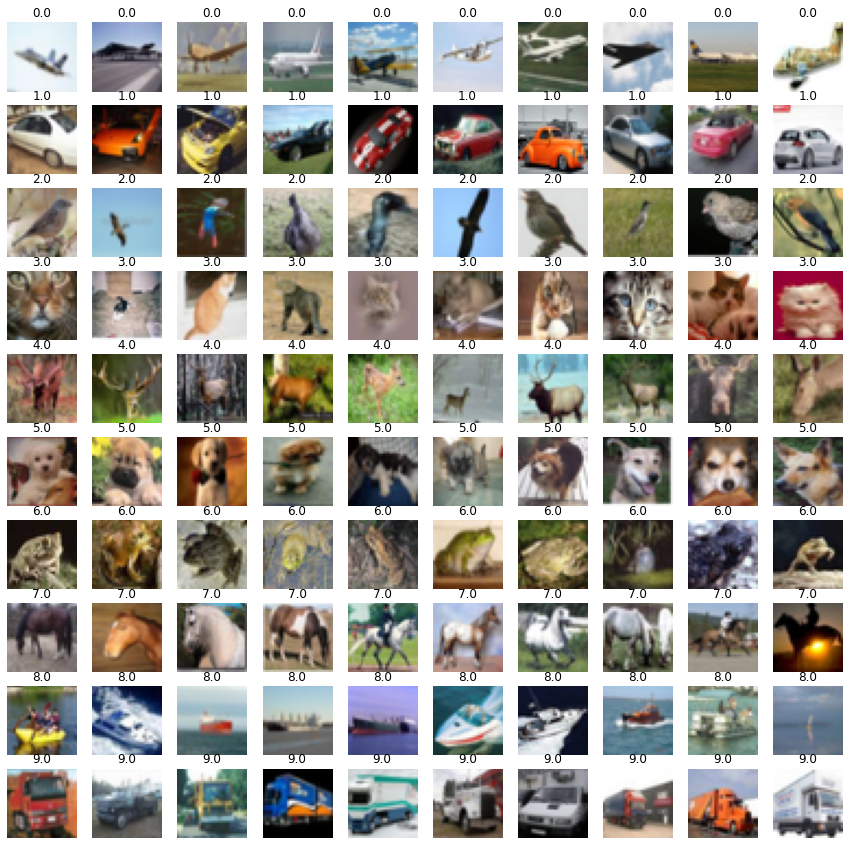

In [207]:
fig = plt.figure(figsize=(15, 15))
img = np.zeros((1024, 3), dtype=np.uint8)
for i in range(100):
    plt.subplot(10, 10, i+1)
    img[:,0] = X[i, :1024]
    img[:,1] = X[i, 1024:2048]
    img[:,2] = X[i, 2048:]

    plt.imshow(img.reshape(32, 32, 3))
    plt.axis('off')
    plt.title(y[i])


# plt.imshow(img.astype(np.uint8).reshape(32, 32, -1))

In [208]:
clf = UKMeans(epsilon=1e-10)
clf.fit(X)

In [209]:
print(f"iteration: {clf.t}, number of clusters: {clf.n_centers}, AR: {clf.accuracy_rate(X, y)}")


iteration: 5, number of clusters: 8, AR: 0
